## 5. Improving our model

First predictions = baseline predictions
Frist model = baseline model

From a data perspective we can ask questions like:
- Could we collect more data?? (generally more data the better)
- Could we improve our data?? (add more features)

From a model perspective we could ask questions like:
- Is there a better model we can use??
- Can we use a more complex model??
- Could we improve the current model?? (Tuning Hyper-parameter)

Hyper-parameters are parameters of the model we can adjust ( settings ) of the model we can adjust to potentially improve the model's ability to predict parameters

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearcCV
3. Exhaustively with GridSearchCV

## 5.1 Adjusting hyperparameters by hand

We are going to try and adjust the following:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

np.random.seed(42)

heart_disease = pd.read_csv(r"C:\Users\cos_9\PycharmProjects\machine_learning_and_data_science_bootcamp\resources\heart-disease.csv")

In [17]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels on a classification
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1: {f1 * 100:.2f}%")
    return {"accuracy": round(accuracy, 3), "precision": round(precision, 3), "recall": round(recall, 3), "f1": round(f1, 3)}

In [40]:
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X, y, test_size=0.3)
X_valid, X_test, y_valid, y_test = train_test_split(X_test_and_val, y_test_and_val, test_size=0.5)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)
baseline_metrics = evaluate_preds(y_valid, y_preds)

Acc: 84.44%
Precision: 70.83%
Recall: 100.00%
F1: 82.93%


In [42]:
np.random.seed(42)

# Create a second classifier with different hyperparameters

clf2 = RandomForestClassifier(n_estimators=500)

clf2.fit(X_train, y_train)

y_preds2 = clf2.predict(X_valid)

clf2_metrics = evaluate_preds(y_valid, y_preds2)

Acc: 84.44%
Precision: 70.83%
Recall: 100.00%
F1: 82.93%


In [43]:
np.random.seed(42)

# Create a second classifier with different hyperparameters

clf3 = RandomForestClassifier(n_estimators=500, max_depth=20)

clf3.fit(X_train, y_train)

y_preds3 = clf3.predict(X_valid)

clf3_metrics = evaluate_preds(y_valid, y_preds3)

Acc: 84.44%
Precision: 70.83%
Recall: 100.00%
F1: 82.93%


# 5.2 Tuning hyperparameters randomly using RandomisedSearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [100, 200, 500, 1000, 1200, 2000],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into train/test
X_train, X_test_and_val, y_train, y_test_and_val = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomisedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimat

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         1200, 2000]},
                   verbose=2)

In [32]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [34]:
rs_y_preds = rs_clf.predict(X_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 86.96%
Precision: 88.46%
Recall: 88.46%
F1: 88.46%


## 5.3 Tuning hyperparameters using GridSearchCV

In [37]:
from sklearn.model_selection import GridSearchCV

grid

grid_2 = {'n_estimators': [500, 1000, 1200, 2000],
 'max_depth': [20, 30, 40],
 'max_features': ['sqrt'],
 'min_samples_split': [4, 6, 8],
 'min_samples_leaf': [2, 4, 6]}

In [39]:
gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)

gs_clf.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1200; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=2000; total time=   2.0s
[CV] END max_depth=20, max_featu

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=2000; total time=   1.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=2000; total time=   2.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=2000; total time=   2.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=2000; total time=   2.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=6, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=20, max_features=

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1000; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_featur

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=2000; total time=   1.7s
[CV] END max_depth=30, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=500; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END max_depth=30, max_features=s

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1000; total time=   0.8s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   1.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   1.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   1.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   1.1s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=1200; total time=   1.0s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=2, min_samples_split=8, n_estimators=2000; total time=   1.7s
[CV] END max_depth=40, max_featu

[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=2000; total time=   1.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=2000; total time=   1.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=2000; total time=   1.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, n_estimators=2000; total time=   1.7s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   0.3s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END max_depth=40, max_features=

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [20, 30, 40], 'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [500, 1000, 1200, 2000]},
             verbose=2)

In [44]:
gs_clf.best_params_

gs_clf_pred = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_clf_pred)

Acc: 89.13%
Precision: 85.71%
Recall: 96.00%
F1: 90.57%


In [45]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, "clf_2": clf2_metrics, 
                                "clf_3": clf3_metrics, "random_search": rs_metrics, "grid_search": gs_metrics})

<AxesSubplot:>

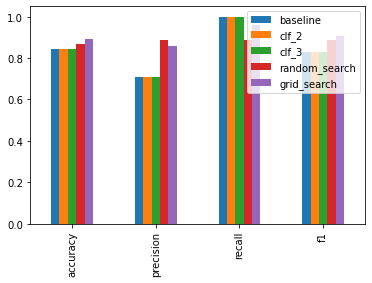

In [48]:
compare_metrics.plot.bar()